# SENTIMENT ANALYSIS ON MOVIE REVIEWS.

## 1. Importing Necessary Libraries.

In [1]:
import time
start = time.time() # To calculate the time taken to run the entire notebook.

In [2]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning) # To ignore Future warnings.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

## 2. Data Collection.

In [4]:
reviews_data = pd.read_csv("IMDB Dataset.csv") 
# IMDB Dataset.csv should be present in the same folder as the notebook to be collected or else specify the path to the file.
reviews_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
print("\nNumber of reviews : ", len(reviews_data))
print("Number of negative reviews : ", len(reviews_data[reviews_data["sentiment"] == "negative"]))
print("Number of positive reviews : ", len(reviews_data[reviews_data["sentiment"] == "positive"]))
print("\n")


Number of reviews :  50000
Number of negative reviews :  25000
Number of positive reviews :  25000




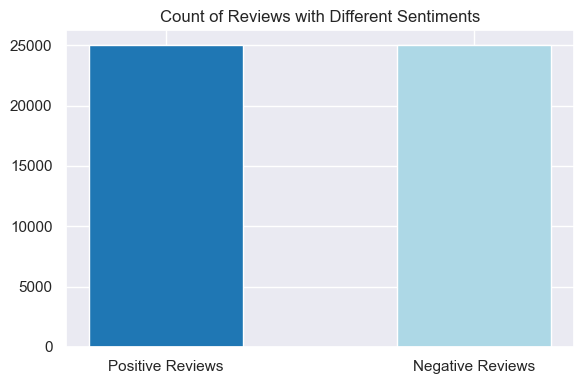

In [6]:
# Ploting the graph of number of positive and negative reviews. 
colors = sns.color_palette("deep", n_colors = 2, desat = .6)
sns.set(style = "darkgrid", font_scale = 1)
plt.figure(figsize = (6, 4), tight_layout = True)
plt.bar(x = ["Positive Reviews", "Negative Reviews"],
        height = reviews_data.value_counts(["sentiment"]),
        color = ["#1f77b4", "#add8e6"],
        width = 0.5)
plt.title("Count of Reviews with Different Sentiments")
plt.savefig("picture_sentiments_count.png")
plt.show()

## 3. Data Pre-Processing. 

### 3.a. Converting into Lowercase & Replacing Contractions.

In [7]:
# This function converts the dataframe to lowercase and replaces contractions with their meanngful words.
def reconstruct(line):
    line = str(line).lower()
    line = line.replace("'ld"," would").replace("'ll", " will").replace("'m", " am")\
           .replace("'re", " are").replace("'ve", " have").replace("€", " euro ").replace("%", " percent ")\
           .replace("₹", " rupee ").replace("$", " dollar ").replace("'s", " own").replace("′", "'").replace("’", "'")\
           .replace("'clock"," of the clock").replace("'cause'"," because").replace("cannot", " can not")\
           .replace("can't", " can not").replace("dasn't"," dare not").replace("daresn't"," dare not")\
           .replace("e'er"," ever").replace("everyone's"," everyone is").replace("finna"," fixing to")\
           .replace("gimme"," give me").replace("gonna"," going to").replace("gotta"," got to")\
           .replace("he's", " he is").replace("how's"," how has").replace("it's", " it is").replace("let's"," let us")\
           .replace("ne'er"," never").replace("n't", " not").replace(",000", " k").replace(",000,000", " m")\
           .replace("o'clock"," of the clock").replace("she's", " she is").replace("what's", " what is")\
           .replace("won't", " will not").replace("y'all"," you all")

    return line

reviews_data["review"] = reviews_data["review"].apply(reconstruct)

### 3.b. Removing html Tags.

In [8]:
# This function removes all html tags from the dataframe.
def remove_html(line):
    text = ""
    tag = False
    for x in line:
        if x == "<":
            tag = True
        elif x == ">":
            tag = False
        elif not tag:
            text += x
    return text

reviews_data["review"] = reviews_data["review"].apply(remove_html)

### 3.c. Removing URLs.

In [9]:
# This function removes all URLs from the dataframe.
def remove_url(line):
    text = ""
    i = 0
    while i < len(line):
        if line[i:i + 4] == "http" or line[i:i + 3] == "www":
            while i < len(line) and line[i] != " ":
                i += 1
        else:
            text += line[i]
            i += 1
    return text

reviews_data["review"] = reviews_data["review"].apply(remove_url)

### 3.d. Removing Numbers or Digits.

In [10]:
# This function removes all digits or numbers from the dataframe.
def remove_numbers(line):
    text = ""
    for x in line:
        if not x.isdigit():
            text += x
    return text.strip()

reviews_data["review"] = reviews_data["review"].apply(remove_numbers)

### 3.e. Removing Punctuation.

In [11]:
# This function removes all punctuations and symbols from the dataframe.
def remove_punctuations(line):
    text  = "".join(filter(lambda x: x.isalnum() or x.isspace(), line))
    return (text)

reviews_data["review"] = reviews_data["review"].apply(remove_punctuations)

### 3.f. Removing Patterns.

In [12]:
# This function removes all same letters that repeats more than twice consecutively from the dataframe.
def remove_patterns(line): 
    text = ""
    words = line.split()
    for word in words:
        if any(letter * 3 in word for letter in set(word)):
            continue
        text += word + " "
    return text.strip()

reviews_data["review"] = reviews_data["review"].apply(remove_patterns)

### 3.g. Removing Words with two or less Letters.

In [13]:
# This function removes all words with 2 or less letters from the dataframe as there are no adjectives with 2 or less letters.
def remove_small_words(line): 
    text  = " ".join([x for x in line.split() if len(x) > 2])
    return (text)

reviews_data["review"] = reviews_data["review"].apply(remove_small_words)

### 3.h. Snowball Stemming.

In [14]:
# Snowball Stemming (stemming) is an algorithm for reducing words to their base or root form ( {ran, running} ---> {run} ).
# The goal of stemming is to reduce words to their core structure, while retaining their semantic meaning.
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("english")    

reviews_data["review"] = reviews_data["review"].apply(ss.stem)

### 3.i. Splitting the Data for Training & Testing.

In [15]:
# X stores the pre-processed reviews and y stores their corrsponding sentiments.
X = reviews_data["review"]
y =  reviews_data["sentiment"]

# The datas X and y are spltted for training and testing. 
# About 67% of the entire data is kept for training the models and the remaining 33% is for testing the models.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.33, random_state = 42 )

In [16]:
# The index of X_train is stored in X_train_index to be used for printing the processed data as a dataframe 
#                                                                       after removing stopwords & applying TF-IDF vectorizer.
X_train_index = X_train.index

### 3.j. Removing Stopwords and Applying TF-IDF Vectorizer.

In [17]:
# Stopwords are common words that can be removed from the dataset. Generally, these words don’t carry much significance.
# TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.
# Done by multiplying 2 metrics:
#    1. How many times a word appears in a document.
#    2. The inverse document frequency of the word across a set of documents.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = "english")

X_train = tfidf.fit_transform(X_train)

# Also fit the test_x_vector
X_test = tfidf.transform(X_test)

# Now, we have removed the stopwords and converted text to a numerical data using tf-idf vectorizer.

In [18]:
# Printing the processed data as a dataframe.
pd.DataFrame.sparse.from_spmatrix( X_train, index = X_train_index, columns = tfidf.get_feature_names_out() )

,aab,aada,aadha,aadmittedly,aag,aage,aaghh,aah,aahed,aahing,...,übermenschlich,übervamp,überwoman,ünel,üvegtigris,üzümcü,þorleifsson,þór,יגאל,כרמון
23990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# List of all the file names where models build will be stored. 
# Will be used during dumping and saving of models using pickle.
saved_models = [
                "model_save_logistic_regression.pickle",
                "model_save_multinomial_naive_bayes.pickle",
                "model_save_random_forest.pickle",
                "model_save_k_nearest_neighbors.pickle",
                "model_save_decision_tree.pickle",
                "model_save_support_vector_machine.pickle"
                ]

# List of names of all models that will be used. 
# This list will be used for plotting the Confusion Matrixes, Overall Visualization and during Prediction.  
model_names = [
                "Logistic Regression",
                "Multinomial Naive Bayes",
                "Random Forest",
                "K Nearest Neighbors",
                "Decision Tree",
                "Support Vector Machine"
                ]

## "All the models are trained and are saved in files after hyperparameter tuning, if you want, you can skip to step 6 directly for predicting the sentiment of reviews. This may save you some time."   

## 4. Model Training.

## 4.A. Training with Default Parameters.

### 4.A.a. Logistic Regression.

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 1000)
# Logistic Regression Model is trained using training data.
log_reg.fit(X_train, y_train)
print("\nLogistic Regression")
print("\nParameters Used :")
print(log_reg.get_params())


Logistic Regression

Parameters Used :
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### 4.A.b. Multinomial Naive Bayes.

In [21]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
# Naive Bayes Model is trained using training data.
mnb.fit(X_train, y_train)
print("\nMultinomial Naive Bayes")
print("\nParameters Used :")
print(mnb.get_params())


Multinomial Naive Bayes

Parameters Used :
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


### 4.A.c. Random Forest.

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# Random Forest Classification Model is trained using training data.
rfc.fit(X_train, y_train)
print("\nRandom Forest")
print("\nParameters Used :")
print(rfc.get_params())


Random Forest

Parameters Used :
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### 4.A.d. K - Nearest Neighbors.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
# K - Nearest Neighbors Classification Model is trained using training data.
knnc.fit(X_train, y_train)
print("\nK - Nearest Neighbors")
print("\nParameters Used :")
print(knnc.get_params())


K - Nearest Neighbors

Parameters Used :
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


### 4.A.e. Decision Tree Classifier.

In [24]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
# Decision Tree Classification Model is trained using training data.
dec_tree.fit(X_train, y_train)
print("\nDecision Tree")
print("\nParameters Used :")
print(dec_tree.get_params())


Decision Tree

Parameters Used :
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


### 4.A.f. Support Vector Machine (SVM).

In [25]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
# Support Vector Classification Model is trained using training data.
svc.fit(X_train, y_train)
print("\nSupport Vector Machine")
print("\nParameters Used :")
print(svc.get_params())


Support Vector Machine

Parameters Used :
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


## 4.B. Hyperparameter Tuning and Saving in Files.

In [26]:
from sklearn.model_selection import GridSearchCV
# For Tuning, GridSearchCV approach is employed.
# It searches for the best set of hyperparameters from a grid of hyperparameters values.

### 4.B.a. Tuning all Models to find Best Parameters.

In [27]:
# This list stores parameters of each model. Used during Tuning
params = [
            { 'C': [ 0.01, 0.1, 1, 10, 100, 1000], 'max_iter':[1000], 'solver': ['liblinear','lbfgs'] },
             
            { 'alpha': [ 0.01, 0.1, 1, 10, 100] },
   
            { 'n_estimators': [10, 100, 500, 1000], 'max_depth': [None, 5] },
    
            { 'n_neighbors': [ 3, 5, 7, 10] },
    
            { 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'] },
    
            { 'C': [ 0.1, 1, 10], 'kernel': ['linear'] }
        ]

# List to store all algorithms. This list will be used during Tuning. 
models = [
            LogisticRegression(),
            MultinomialNB(),
            RandomForestClassifier(),
            KNeighborsClassifier(),
            DecisionTreeClassifier(),
            SVC()
         ]

# Empty list made to store GridSearchCV() of all models.
grid = []

# Empty list created to store models with best parameters.
# This list will be used to build models with best parameters and then those models will be saved as files.
# Also used during Model Evaluation using Pipeline.
algorithms = []

# Empty list made to store best parameters of all models.
parameters = []

In [28]:
print("\n")
for i in range(len(models)) :
        
        # GridSearchCV object is created for each model in the "models" list, 
        # with the corresponding hyperparameters from the "params" list, and a 5-fold cross-validation (cv = 5).
        grid.append(GridSearchCV(models[i], params[i], cv = 5))
        
        # fit function is then called on each GridSearchCV object with the training data to perform the grid search.
        grid[i].fit(X_train, y_train)

        # The models with its best parameters are stored in the list "algorithms".
        algorithms.append(grid[i].best_estimator_)
        
        # The best parameters from each grid search are stored in the list "parameters".
        parameters.append(grid[i].best_params_)
        
        # Printing.
        print(grid[i].best_estimator_)
        print("Best Parameters :", grid[i].best_params_, "\n")



LogisticRegression(C=10, max_iter=1000, solver='liblinear')
Best Parameters : {'C': 10, 'max_iter': 1000, 'solver': 'liblinear'} 

MultinomialNB(alpha=1)
Best Parameters : {'alpha': 1} 

RandomForestClassifier(n_estimators=1000)
Best Parameters : {'max_depth': None, 'n_estimators': 1000} 

KNeighborsClassifier(n_neighbors=10)
Best Parameters : {'n_neighbors': 10} 

DecisionTreeClassifier(criterion='entropy', splitter='random')
Best Parameters : {'criterion': 'entropy', 'splitter': 'random'} 

SVC(C=1, kernel='linear')
Best Parameters : {'C': 1, 'kernel': 'linear'} 



### 4.B.b. Building All The Models With The Best Hyperparameters & Saving Them In Files.

In [29]:
# For Saving the Models after training it with best parameters.
from pickle import dump

In [30]:
# Loop created for building and saving all models.
for name, file_name, model in zip(model_names, saved_models, algorithms):
    
    # Models are build.
    model.fit(X_train, y_train)
    
    # For printing parameters used by all models. 
    print(f"\n\n{name}:\n\nParameters Used :\n{model.get_params()}")
    
    # Models builded are then saved.
    with open(file_name, "wb") as file:
        dump(model, file)

Logistic Regression:

Parameters Used :
{'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Multinomial Naive Bayes:

Parameters Used :
{'alpha': 1, 'class_prior': None, 'fit_prior': True}
Random Forest:

Parameters Used :
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
K Nearest Neighbors:

Parameters Used :
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors'

## 5. Model Evaluation.

## 5.A. Using Pipeline.

In [31]:
# For estimating the scores of different models.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
# To store the results.
results = []

# For looping over each algorithm.
print("\nThese are the scores scored by each model after pipeline\n")
for i in range(len(algorithms)):
    
    # Creating a pipeline with StandardScaler and the respective algorithm.
    pipe = Pipeline([("scaler", StandardScaler(with_mean = False)), ("classifier", algorithms[i])])

    # Fitting the pipeline to the training data.
    pipe.fit(X_train, y_train)

    # Evaluating the pipeline on the testing data.
    score = pipe.score(X_test, y_test)

    # Appending the score to the results list.
    results.append(score)
    
    # Printing.
    print(f"{algorithms[i].__class__.__name__} : {results[i]}\n")
    

# Index of model with the Best Result are found using max and stored in index.
index = results.index(max(results))
print(f"\n\n\nModel with best result is : \n{algorithms[index].__class__.__name__} : {results[index]}\n")


These are the scores scored by each model after pipeline

LogisticRegression : 0.8515151515151516

MultinomialNB : 0.7081818181818181

RandomForestClassifier : 0.8655757575757576

KNeighborsClassifier : 0.4976969696969697

DecisionTreeClassifier : 0.7256969696969697

SVC : 0.8456969696969697




Model with best result is : 
RandomForestClassifier : 0.8655757575757576



## 5.B. Using Confusion Matrix &  Metrics Scores.

In [33]:
# For calculating the accuracy, precision, recall, specificity, f1 score of the models.
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)

# For printing the confusion matrix of the model.
from sklearn.metrics import confusion_matrix

# For loading the models. 
from pickle import load

# For calculating the metrics scores & making confusion matrix 'positive' & 'negative' targets, 
#                                                                      are labelled as 1s & 0s respectively.
y_test_labels = np.where(y_test == "positive", 1, 0)

In [34]:
# List of file names of the confusion matrixes made to be stored.
cfm_pic_names = [
                    "picture_cfm_logistic_regression.png",
                    "picture_cfm_multinomial_naive_bayes.png",
                    "picture_cfm_random_forest.png",                    
                    "picture_cfm_k_nearest_neighbors.png",
                    "picture_cfm_decision_tree.png",
                    "picture_cfm_support_vector_machine.png"
                ]

# Empty list values is created to store the Accuracy, Precision, Recall, Specificity & F1 score of all the models.
values = []







Logistic Regression : <class 'sklearn.linear_model._logistic.LogisticRegression'>

Accuracy : 0.8905454545454545
Precision : 0.8823390709738269
Recall : 0.9025566811384467
Specificity : 0.878411306042885
F1-Score : 0.8923333730773816

Confusion Matrix :


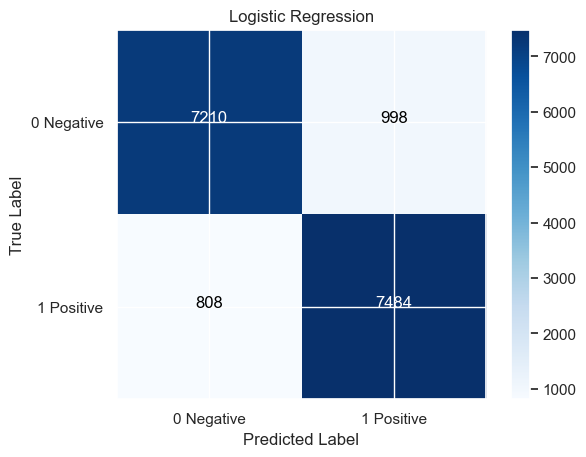







Multinomial Naive Bayes : <class 'sklearn.naive_bayes.MultinomialNB'>

Accuracy : 0.864
Precision : 0.8714075165806927
Recall : 0.855643994211288
Specificity : 0.8724415204678363
F1-Score : 0.8634538152610443

Confusion Matrix :


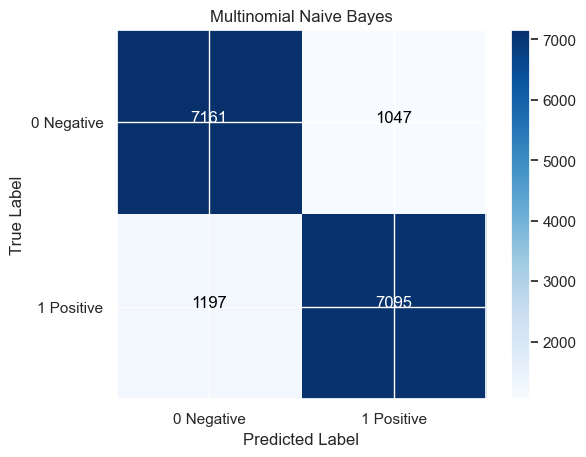







Random Forest : <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Accuracy : 0.8652121212121212
Precision : 0.8614486538003335
Recall : 0.8720453449107574
Specificity : 0.8583089668615984
F1-Score : 0.8667146110511805

Confusion Matrix :


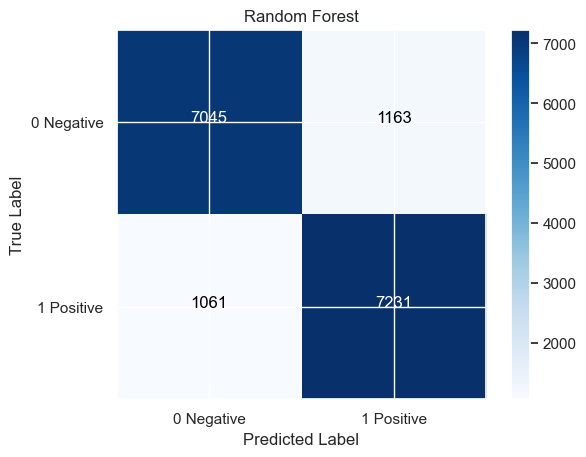







K Nearest Neighbors : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Accuracy : 0.7778181818181819
Precision : 0.7743772241992882
Recall : 0.7872648335745297
Specificity : 0.7682748538011696
F1-Score : 0.780767850735558

Confusion Matrix :


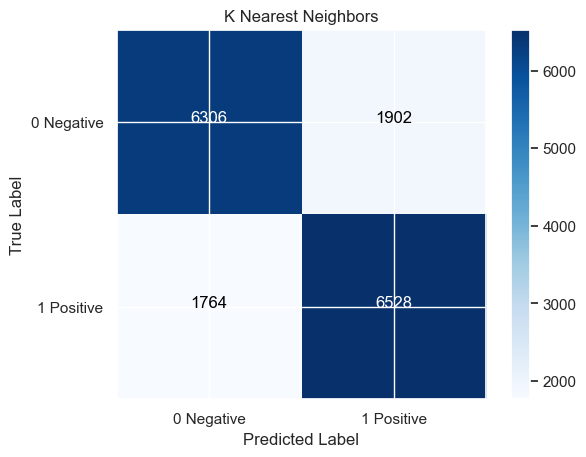







Decision Tree : <class 'sklearn.tree._classes.DecisionTreeClassifier'>

Accuracy : 0.7310909090909091
Precision : 0.7350896450786681
Recall : 0.7268451519536903
Specificity : 0.7353801169590644
F1-Score : 0.7309441513552847

Confusion Matrix :


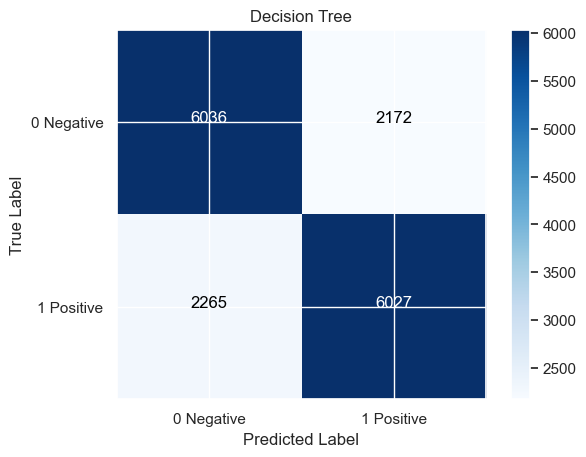







Support Vector Machine : <class 'sklearn.svm._classes.SVC'>

Accuracy : 0.8909090909090909
Precision : 0.8818823529411765
Recall : 0.9040038591413411
Specificity : 0.8776803118908382
F1-Score : 0.8928060981419724

Confusion Matrix :


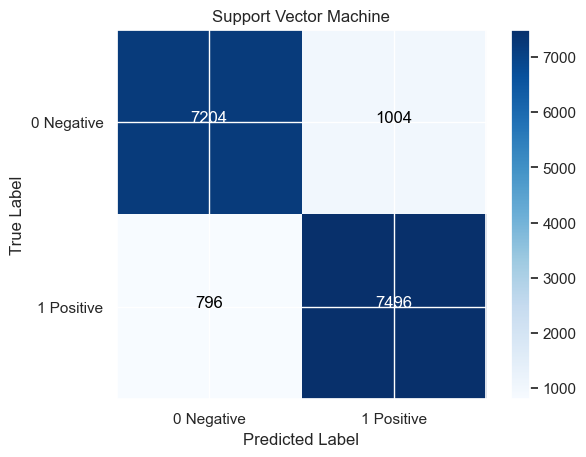

In [35]:
for z in range(len(saved_models)) :
        
    # Loading the model using pickle.
    with open(saved_models[z], "rb") as file:
        model = load(file)
        
    # The targets of test values are predicted using the model.
    y_pred = model.predict(X_test)
    
    # 'positive' & 'negative' predictions are encoded as 1s & 0s respectively.
    y_pred_labels = np.where(y_pred == "positive", 1, 0)
    
    # Calculating the accuracy, precision, recall, specificity, f1 score of the models.
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels)
    recall = recall_score(y_test_labels, y_pred_labels)
    specificity = recall_score(y_test_labels, y_pred_labels, pos_label = 0)
    f1 = f1_score(y_test_labels, y_pred_labels)

    # Printing the metrics scores of the model.
    print(f"\n\n\n\n\n\n{model_names[z]} : {type(model)}\n")
    print(f"Accuracy : {accuracy}")
    print(f"Precision : {precision}")
    print(f"Recall : {recall}")
    print(f"Specificity : {specificity}")
    print(f"F1-Score : {f1}")
    
    # Appending the metrics scores of each model to list values.
    values.append([accuracy, precision, recall, specificity, f1])
    
    # Making the confusion matrix of the model.
    conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
    print("\nConfusion Matrix :")

    # Plotting the confusion matrix of models.
    plt.imshow(conf_matrix, cmap = "Blues")
    plt.title(model_names[z])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks([0, 1], ["0 Negative", "1 Positive"])
    plt.yticks([0, 1], ["0 Negative", "1 Positive"])
    plt.colorbar()

    threshold = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, conf_matrix[i, j],
            horizontalalignment = "center",
            color = "white" if conf_matrix[i, j] > threshold else "black")

    plt.savefig(cfm_pic_names[z])
    plt.show()

## 5.C. Visualization of Scores.

###  5.C.a. Pipeline Scores of Different Models.

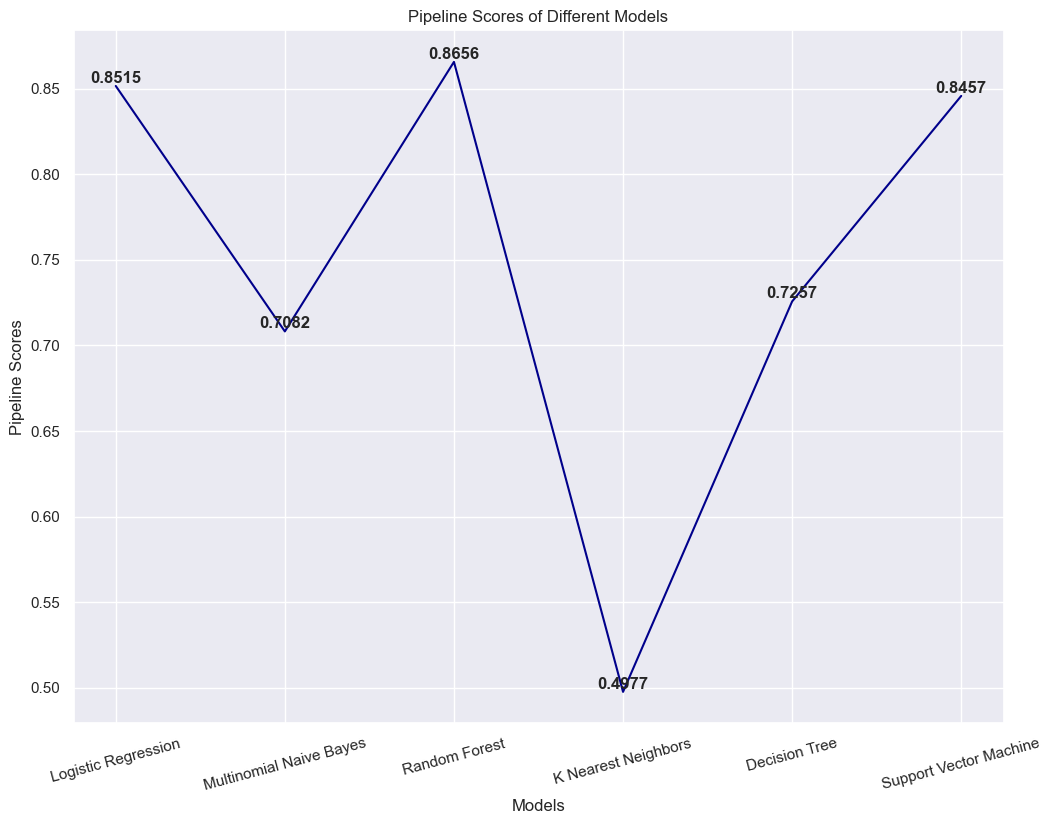

In [36]:
# Line chart of pipeline scores of different models are made.

sns.set(style = "darkgrid")
plt.figure(figsize = (12, 9))
plt.plot(model_names, results, color = "darkblue")

for i, j in zip(model_names, results):
    plt.text(i, j, str(round(j, 4)), ha = "center", va = "bottom", fontweight = "bold")

plt.title("Pipeline Scores of Different Models")
plt.xlabel("Models")
plt.ylabel("Pipeline Scores")
plt.xticks(rotation = 15)

plt.savefig("picture_pipeline_scores.png")
plt.show()

### 5.C.b. Metrics Scores of Different Models.

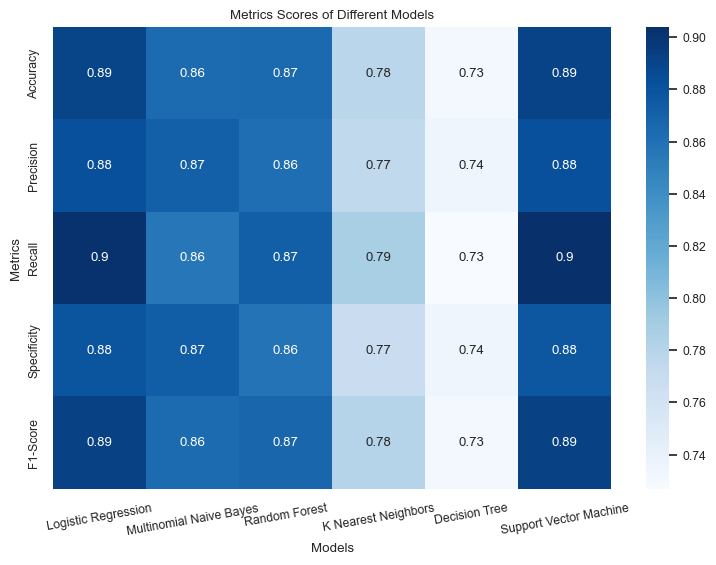

In [37]:
# The heatmap of accuracy, precision, recall & f1score of each models are made.

df = pd.DataFrame(values, index = model_names, columns = ["Accuracy", "Precision", "Recall", "Specificity", "F1-Score"])
df = df.T

plt.figure(figsize = (9, 6))
sns.set(font_scale = .8)
sns.heatmap(df, annot = True, cmap = "Blues")
plt.xlabel("Models")
plt.xticks(rotation = 10) 
plt.ylabel("Metrics")
plt.title("Metrics Scores of Different Models")
plt.savefig("picture_metrics_scores.png")
plt.show()

### 5.C.c. Change in Accuracy, Precision, Recall & F1 Score Over Different Models.

In [38]:
# Empty lists A, P, R, F are made to store the accuracy, precision, recall & f1 score of each models respectively.
A, P, R, F = [], [], [], []
for i in range(len(values)):
    A.append(values[i][0])
    P.append(values[i][1])
    R.append(values[i][2])
    F.append(values[i][4])
    # The accuracy, precision, recall & f1 score of each models are appended to the lists A, P, R, F respectively. 

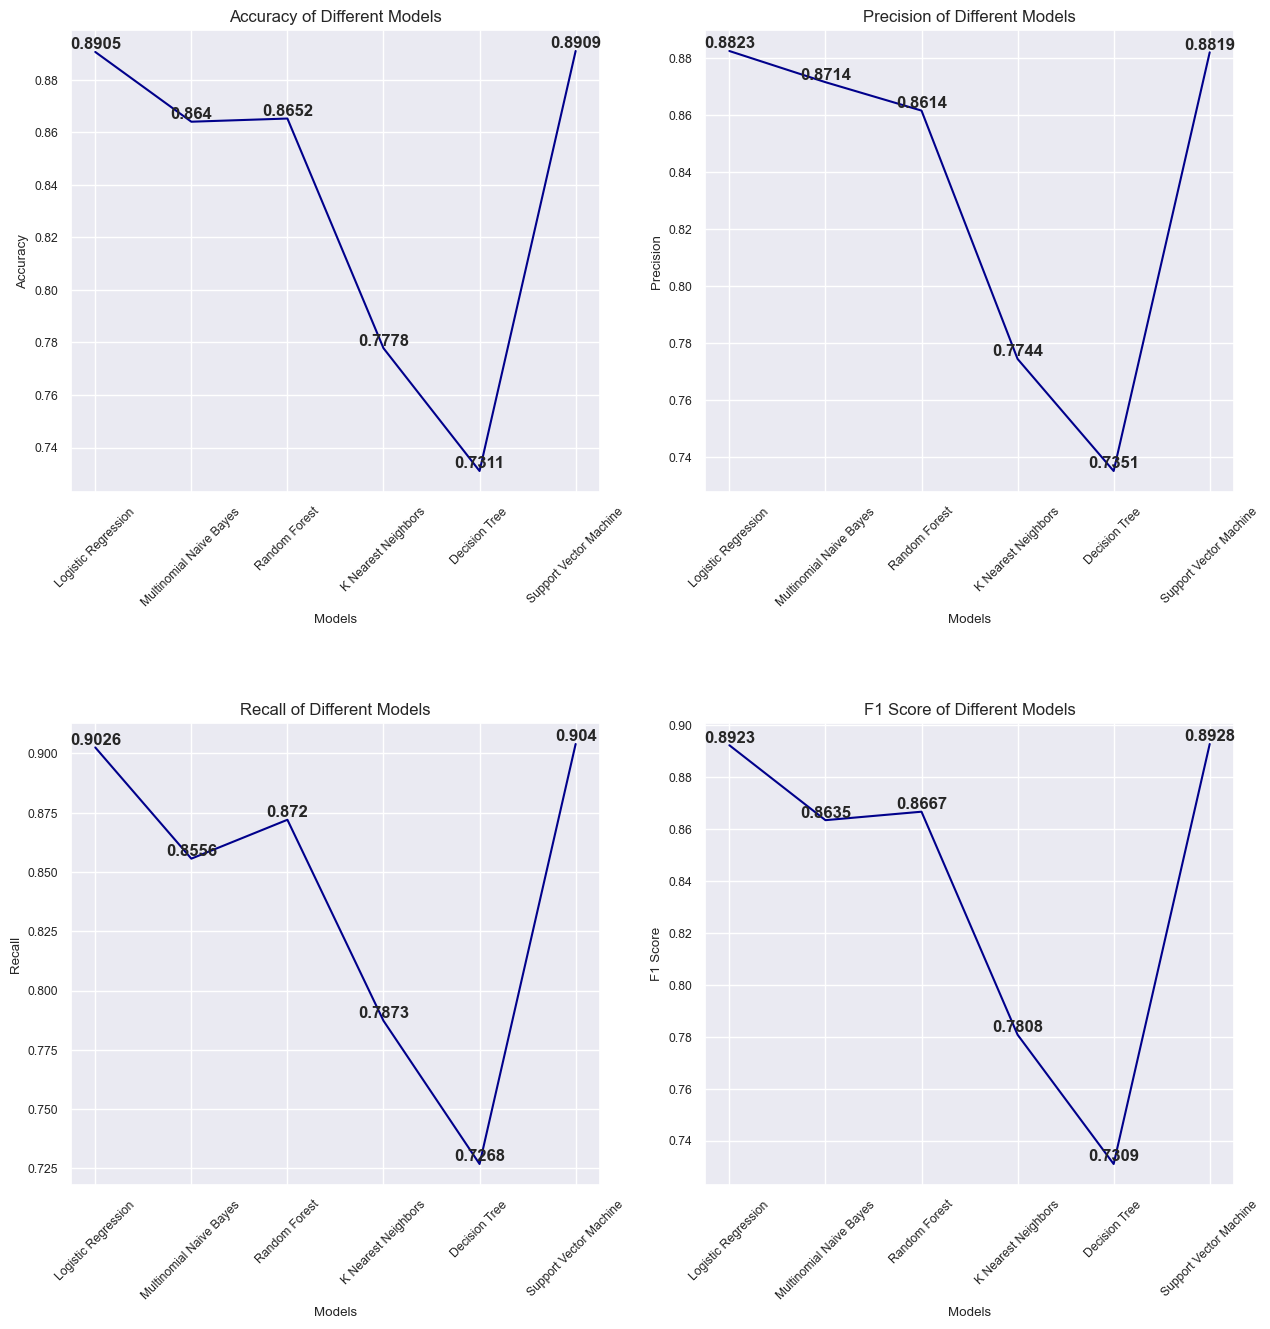

In [39]:
# Creating a 2x2 subplot figure with a size of 15x15.
fig, axs = plt.subplots(2, 2, figsize = (15, 15))

sns.set(style = "darkgrid", font_scale = 1)
# A list of tuples are made, where each tuple consists of a metric value and its name.
metrics = [(A, "Accuracy"), (P, "Precision"), (R, "Recall"), (F, "F1 Score")]

# Loop through each axis and metric tuple in the flattened array of subplot axes and metrics.
for ax, (m, name) in zip(axs.flat, metrics):
    
    # Plot the metric values for each model.
    ax.plot(model_names, m, color = "darkblue")
    
    # Add text with metric values for each model.
    for i, j in zip(model_names, m):
        ax.text(i, j, str(round(j, 4)), ha = "center", va = "bottom", fontweight = "bold")
    
    ax.set_xlabel("Models")
    ax.set_ylabel(name)
    ax.set_title(f"{name} of Different Models")
    
    # Set the x-axis tick labels as the model names, rotated by 90 degrees.
    ax.set_xticks(range(len(model_names)), model_names, rotation = 45)

plt.subplots_adjust(hspace = .5)
plt.savefig(" picture_models_performance.png")
plt.show()

#### Time taken to run the notebook.

In [40]:
end = time.time()
time_took = end - start
hours = int(time_took / 3600)
mint = int((time_took % 3600) / 60)
sec = int(time_took % 60)
print(f"\nTime taken to run the code: {hours} hours, {mint} minutes, and {sec} seconds\n")


Time taken to run the code: 8 hours, 32 minutes, and 8 seconds



## 6. Prediction.

In [41]:
# For loading the desired model to predict. 
from pickle import load

In [42]:
# This function calls all the pre-processing functions to be done on the review given by the user before predicting.
def pre_pros(line):
    line = reconstruct(line)
    line = remove_html(line)
    line = remove_url(line)
    line = remove_numbers(line)
    line = remove_punctuations(line)
    line = remove_patterns(line)
    line = remove_small_words(line)
    line = ss.stem(line)
    line = tfidf.transform([line])
    return line

In [43]:
# c stores the choice of the user that if he wants to predict the sentiment of a review or not.
c = int(input("\nPress 1 to find the sentiment of a review you provide. \nPress 0 to skip.\t"))

# Loop made to continue asking the user that if he wants to predict the sentiment of a review or not.
while c == 1:
    
    sentiment = []
    # User input of review is taken as rev. 
    rev = input("\n\nEnter the review you want to find the sentiment of? \n")
    pros_rev = pre_pros(rev)             # Function to perform all preprocessing on the review is called.
    print("\n\n\n")
    for i in range(len(model_names)):

        # File names are stored in the list saved_models. Each files are imported using index.  
        file_name = saved_models[i]

        # Loading the model using pickle.
        with open(file_name, "rb") as file:
            model = load(file)
        
        sentiment.append(model.predict(pros_rev))  # Prediction of sentiment of the review using the model selected by user.
    
        print(f"\nUsing {model_names[i]}, Predicted Sentiment is : {sentiment[i]}")
   
    # Asking the user if he want to further continue predicting sentiments.
    c = int(input("\n\n\nPress 1 to continue finding sentiments of reviews. \nPress 0 to skip.\t"))


Press 1 to find the sentiment of a review you provide. 
Press 0 to skip.	1


Enter the review you want to find the sentiment of? 
Absolutely loved watching this!! Me and my whole family went to the cinema and we all adored it. It was funny, the scripting was good, acting was spectacular, it was witty. The whole cast are fantastic! It definitely didn't fail to put a smile on my face and I enjoyed listening to my family and the rest of audience laugh along too.





Using Logistic Regression, Predicted Sentiment is : ['positive']

Using Multinomial Naive Bayes, Predicted Sentiment is : ['positive']

Using Random Forest, Predicted Sentiment is : ['positive']

Using K Nearest Neighbors, Predicted Sentiment is : ['positive']

Using Decision Tree, Predicted Sentiment is : ['positive']

Using Support Vector Machine, Predicted Sentiment is : ['positive']



Press 1 to continue finding sentiments of reviews. 
Press 0 to skip.	1


Enter the review you want to find the sentiment of? 
The film is